<div style="background-color:#fdecea; padding:12px; border-left:6px solid #f44336;">
    <strong>❓ Question: </strong> Are written in red.
</div>

<div style="background-color:#e8f4fd; padding:12px; border-left:6px solid #2196f3;">
    <strong>💡 Notes and Ideas: </strong> Are written in blue.
</div>

<div style="background-color:#fffde7; padding:12px; border-left:6px solid #ffeb3b;">
    <strong>🛠️ To Do's:</strong> 
    <br>    
    - In yellow


</div>


# GHKT Model Replication - MATLAB in Jupyter
Based on: Golosov et al. (2014) and Barrage (2014)

In [2]:
% Check basic output
disp('✅ Kernel is running');

% Dummy number
1+1

pwd


✅ Kernel is running


ans = 2

ans = 'C:\Users\Gebruiker\Desktop\thesis\modeling\notebooks\ghkt_model'

## Section 1: Model Parameters
Based on section 1 from GHKT_Main.m

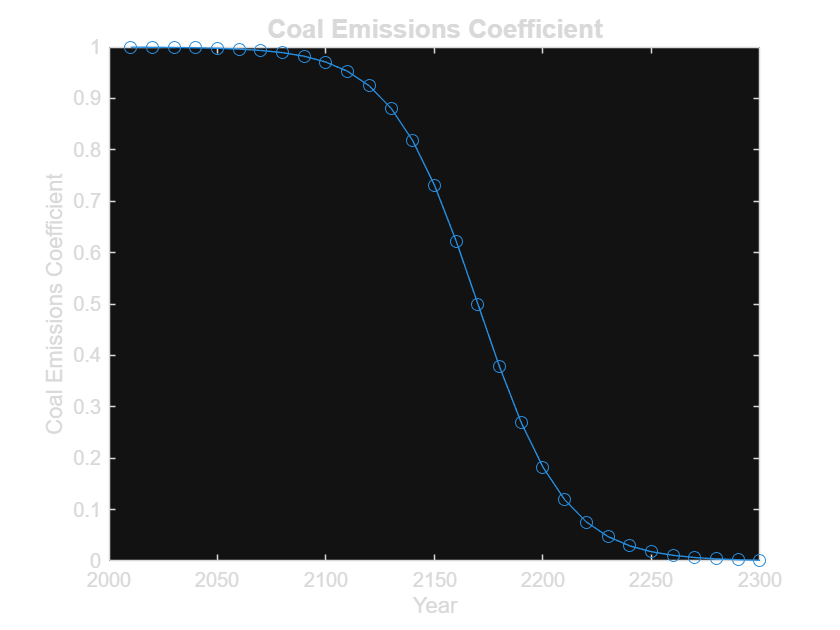

In [3]:


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%      Section 1: Parameters        %%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%%Time%%
%%%%%%%%
T = 30;             %Number of direct optimization periods T
y = (1:1:T);        %Corresponding calendar years    
y(1) = 2010;
for i = 1:1:T-1;
    y(1+i) = 2010+((i)*10);
end
n = 100;            %Number of pre-balanced growth path simulation periods after T
y2 = (1:1:T+n);     %Corresponding calendar years   
y2(1) = 2010;
   for i = 1:1:T-1+n;
       y2(1+i) = 2010+((i)*10);
   end

%%Climate and Damages%%
%%%%%%%%%%%%%%%%%%%%%%%
phi = 0.0228;       %Carbon depreciation per annum (remaining share)
phiL = 0.2;         %Carbon emitted to the atmosphere staying there forever
phi0 = 0.393;       %Share of remaining emissions exiting atmosphere immediately
Sbar = 581;         %Pre-industrial atmospheric GtC
S1_2000 = 103;      %GtC
S2_2000 = 699;      %GtC
gamma = zeros(T,1); 
for i = 1:1:T;
    gamma(i) = 0.000023793; %Damage elasticity
end
 
%%Energy Aggregation%%
%%%%%%%%%%%%%%%%%%%%%%
rho = -0.058;      %Elasticity of substitution between energy sources
kappa1 = 0.5429;   %Relative efficiency of oil
kappa2 = 0.1015;   %Relative efficiency of coal
kappa3 = 1-kappa1-kappa2; %Relative efficiency of low-carbon technologies

%%Final Goods Production%%
%%%%%%%%%%%%%%%%%%%%%%%%%%
N = 1;                      %Normalize population
alpha = 0.3;                %Capital output share
v = 0.04;                   %Energy output share
Y2009 = 70000;              %Base year annual GDP in billions of USD
r2009 = 0.05;               %Base year annual net rate of return 
r2009d = ((1+r2009)^10)-1;  %Base yer decadal net rate of return

%%%Depreciation OPTION 1: delta = 100%
delta = 1;                              %Annual depreciation rate
Delta = (1-(1-delta)^10);               %Decadal depreciation rate
K0 = (alpha*Y2009*10)/(r2009d+Delta);   %Base year capital stock in billions of USD

% %%%Depreciation OPTION 2: delta = 65%, no recalibration:
% delta = 0.1;                            %Annual depreciation rate
% Delta = (1-(1-delta)^10);               %Decadal depreciation rate
% Delta1 = 1;                             %Decadal 100% depreciation rate
% K0 = (alpha*Y2009*10)/(r2009d+Delta1);  %Base year capital stock in billions of USD
 
% %Depreciation OPTION 3: delta = 65%, with recalibration:
% delta = 0.1;                            %Annual depreciation rate
% Delta = (1-(1-delta)^10);               %Decadal depreciation rate
% K0 = (alpha*Y2009*10)/(r2009d+Delta);   %Base year capital stock in billions of USD
 
 pi00 = 1;               %Base period share of labor devoted to final goods production
 E1_2008 = 3.43+1.68;    %GtC per annum
 E2_2008 = 3.75;         %GtC per annum
 E3_2008 = 1.95;         %GtC-eq per annum
 E0_2008 = ((kappa1*E1_2008^rho)+(kappa2*E2_2008^rho)+(kappa3*E3_2008^rho))^(1/rho);
 E0 = E0_2008*10;        %GtC per decade
 A0 = (Y2009*10)/((exp((-gamma(1))*((S1_2000+S2_2000)-Sbar)))*((K0^alpha)*((N*pi00)^(1-alpha-v))*(E0^v)));  %Initial TFP based on Decadal production function


%%%Productivity Growth Rates%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%%%Energy Sector%%%
gZa_en = 0.02;                                         %Annual labor productivity growth rate (energy sectors)
gZ_en = ((1+gZa_en)^10)-1;                             %Decadal labor productivity growth rate (energy sectors)

%%%Final Goods Sector OPTION 1: Specify Labor Productivity Growth%%%
%           gZa_y = 0.02;                               %Annual labor productivity growth rate in final goods sector
%           gAa_y = (1+gZa_y)^(1-alpha-v);              %Corresponding TFP growth
%           gZd_y = ones(T+n,1)*(((1+gZa_y)^10)-1);     %Decadal labor productivity growth rate (all sectors)
%  
%%%Final Goods Sector OPTION 2: Specify TFP Growth%%%
%            gAa_y = 0.02;                            %Annual TFP growth rate (final output sector)
             gAa_y = 0;                               %Alt. Annual TFP growth ate (final output sector)
             gZa_y = ((1+gAa_y)^(1/(1-alpha-v)))-1;   %Corresponding annual labor productivity growth rate (final output sector)
             gAd_y = ((1+gAa_y)^10)-1;                %Decadal TFP growth rate (final output sector)
             gZd_y = ones(T+n,1)*(((1+gZa_y)^10)-1);  %Decadal labor productivity growth rate (final output sector)
 
%%%Final Goods Sector OPTION 3: DICE Model TFP Growth%%%
%     gANH0 = 0.160023196685654;                   %Initial decade (2005-2015) TFP growth rate
%     gammaNH0 = 0.00942588385340332;              %Rate of decline in productivity growth rate (percent per year)
%     gammaNH1 = 0.00192375245926376;              %Rate of decline of decline in productivity growth rate (percent per year)
%     gANH_y = zeros(T,1);
%     for i = 1:1:T;
%              gANH_y(i) = gANH0*exp(((-gammaNH0)*10*(i))*exp((-gammaNH1)*10*(i)));
%     end
%     for j = 1:1:n,
%         gANH_y(T+j) = gANH_y(T);
%     end
%     gANHa = zeros(T+n,1);
%     gANHa_y = ((1+gANH_y(T))^(1/10))-1;         %Annual long-run TFP growth rate
%     gZd_y = zeros(T+n,1);                      %Decadal labor productivity growth rate
%     for i = 1:1:T+n,
%         gZd_y(i) = ((1+gANH_y(i))^(1/(1-alpha-v)))-1;
%         gANHa(i) = ((1+gANH_y(i))^(1/10))-1;
%     end
%     z = 35;
%     plot(y2(1:z),(gANHa(1:z)*100))
%     xlabel('Year','FontSize',11)
%     ylabel('gTFP in Percent per Year','FontSize',11)
%     title('2010-DICE Model Annual TFP Growth','FontSize',13)
  

%%Final Good Sector TFP Levels%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
At = zeros(T,1);
At(1) = A0;                 
for i = 1:1:T-1;
   At(i+1) = At(i)*(1+gZd_y(i))^(1-alpha-v);     
end

%%Long-run Output Growth Rate on BGP%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
gZBGP = gZd_y(T);             
% gZBGP = gZ_en;      %Alternative possible value for gTFP=1.5% to roughly account for declining oil output   

%%Utility%%
%%%%%%%%%%%
% sigma = 0.5;      
 sigma = 1;         %Logarithmic preferences
% sigma = 1.5;
% sigma = 2 ;

%%Beta OPTION 1: Specify exogenously%%%
beta = (.985)^10;  
% beta = (.999)^10;

%%Beta OPTION 2: Calibrate to maintain effective discount factor = .985%%%
% beta_hat = ((.985)^10)/((1+gZd_y(1))^(1-sigma))
% beta = beta_hat;
    
  
%%Coal production%%
%%%%%%%%%%%%%%%%%%%
A2t = zeros(T,1);
A2t(1) = 7693;          
for i = 1:1:T-1;
    A2t(i+1) = A2t(i)*(1+gZ_en);
end

%%Coal Emissions%%
%%%%%%%%%%%%%%%%%%
ypsilon = zeros(T,1);   %Coal carbon emissions coefficient
a_yps = 8;              %Logistic curve coefficient
b_yps = -0.05;          %Logistic curve coefficient
for i = 1:1:T+n;
     ypsilon(i) = 1/(1+exp((-1)*(a_yps+b_yps*(i-1)*10)));
end

%%Graph for Figure S.1%%
figure;
%the original line -plot(y,ypsilon,'-o')- gave an x-axis until 3400 therefore changed to below 
plot(y,ypsilon(1:T),'-o')
xlabel('Year','FontSize',11)
ylabel('Coal Emissions Coefficient','FontSize',11)
title('Coal Emissions Coefficient','FontSize',13)


%%Wind production%%
%%%%%%%%%%%%%%%%%%%
A3t = zeros(T,1);
A3t(1) = 1311;
for i = 1:1:T-1;
    A3t(i+1) = A3t(i)*(1+gZ_en);
end

%%Oil%%
%%%%%%%
R0 = 253.8;     %GtC

In [4]:
%% Self added for verification

function print_parameters(T, n, phi, phiL, phi0, Sbar, ...
    S1_2000, S2_2000, gamma, rho, kappa1, kappa2, kappa3, ...
    N, alpha, v, Y2009, r2009, r2009d, delta, Delta, K0, ...
    pi00, E0_2008, E0, A0, gZa_en, gZ_en, ...
    gZd_y, At, gZBGP, sigma, beta, ...
    A2t, ypsilon, A3t, R0)

disp('======= MODEL PARAMETERS VERIFICATION =======')
fprintf('T = %d | n = %d\n\n', T, n)

fprintf('-- Climate and Carbon Cycle Parameters --\n')
fprintf('phi = %.3f | phiL = %.3f | phi0 = %.3f | Sbar = %.1f\n', phi, phiL, phi0, Sbar)
fprintf('S1_2000 = %.1f | S2_2000 = %.1f\n\n', S1_2000, S2_2000)

fprintf('-- Productivity and Growth Parameters --\n')
fprintf('gamma = %.3f | gZ_en = %.3f | gZa_en = %.3f | A0 = %.1f\n', gamma, gZ_en, gZa_en, A0)
fprintf('gZBGP = %.3f | sigma = %.3f | beta = %.6f\n\n', gZBGP, sigma, beta)

fprintf('-- Economic Parameters --\n')
fprintf('alpha = %.3f | v = %.3f | N = %.3f\n', alpha, v, N)
fprintf('delta = %.3f | Delta = %.3f | K0 = %.3f\n', delta, Delta, K0)
fprintf('Y2009 = %.1f | r2009 = %.3f | r2009d = %.3f\n', Y2009, r2009, r2009d)
fprintf('pi00 = %.3f | E0_2008 = %.3f | E0 = %.3f\n\n', pi00, E0_2008, E0)

fprintf('-- Emissions & Energy Technology --\n')
fprintf('R0 = %.1f\n', R0)
disp(['A2t (coal prod, first 5)    = ', mat2str(A2t(1:5), 4)])
disp(['ypsilon (coal emission, 5) = ', mat2str(ypsilon(1:5), 6)])
disp(['A3t (wind prod, first 5)   = ', mat2str(A3t(1:5), 4)])
disp(['At (TFP level, first 5)    = ', mat2str(At(1:5), 4)])
disp(['gZd_y (growth rate, 5)     = ', mat2str(gZd_y(1:5), 6)])

disp('=============================================')
end

print_parameters(T, n, phi, phiL, phi0, Sbar, ...
    S1_2000, S2_2000, gamma, rho, kappa1, kappa2, kappa3, ...
    N, alpha, v, Y2009, r2009, r2009d, delta, Delta, K0, ...
    pi00, E0_2008, E0, A0, gZa_en, gZ_en, ...
    gZd_y, At, gZBGP, sigma, beta, ...
    A2t, ypsilon, A3t, R0)




======= MODEL PARAMETERS VERIFICATION =======
T = 30 | n = 100

-- Climate and Carbon Cycle Parameters --
phi = 0.023 | phiL = 0.200 | phi0 = 0.393 | Sbar = 581.0
S1_2000 = 103.0 | S2_2000 = 699.0

-- Productivity and Growth Parameters --
gamma = 0.000 | gZ_en = 0.000 | gZa_en = 0.000 | A0 = 0.0
gamma = 0.000 | gZ_en = 0.000 | gZa_en = 0.000 | A0 = 0.0
gamma = 0.000 | gZ_en = 0.000 | gZa_en = 0.000 | A0 = 0.0
gamma = 0.000 | gZ_en = 0.000 | gZa_en = 0.000 | A0 = 0.0
gamma = 0.000 | gZ_en = 0.000 | gZa_en = 0.000 | A0 = 0.0
gamma = 0.000 | gZ_en = 0.000 | gZa_en = 0.000 | A0 = 0.0
gamma = 0.000 | gZ_en = 0.000 | gZa_en = 0.000 | A0 = 0.0
gamma = 0.000 | gZ_en = 0.000 | gZa_en = 0.219 | A0 = 0.0
gamma = 17887.301 | gZ_en = gZBGP = 0.000 | sigma = 1.000 | beta = 0.859730

-- Economic Parameters --
alpha = 0.300 | v = 0.040 | N = 1.000
delta = 1.000 | Delta = 1.000 | K0 = 128921.783
Y2009 = 70000.0 | r2009 = 0.050 | r2009d = 0.629
pi00 = 1.000 | E0_2008 = 3.495 | E0 = 34.952

-- Emissions 

<div style="background-color:#e8f4fd; padding:12px; border-left:6px solid #2196f3;">
    <strong>💡 Notes and Ideas: </strong>
    I think it the matlab code is set up so that different files are saved and then called on in the code. I prefer to not have this and to have 
    one big notebook that can be replicated easily without having to download files and store them in the correct locations for it to run. This 
    does mean (according to the help of Copilot) that I have to create new functions which is what I am currently working on.
</div>

## Section 2, 3 & 4: Solve for Optimal Choice Variables X, Objective Function and Constraints 
Based on section 1 from GHKT_Main.m, GHKT_Objective.m and GHKT_Constraints.m

In [5]:

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%      Section 2: Solve for Optimal Choice Variables X        %%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

vars = 2*T+2*(T-1);     %Number of variables

%%Define upper and lower bounds%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
lb = zeros(vars,1);
ub = ones(vars,1);
for i = 1:1:T-1;
    ub(i) = 1;              %For savings rate
    lb(i) = 0.00001;        %For savings rate
    ub((T-1)+i) = R0;       %For oil stock remaining Rt
    lb((T-1)+i) = 0.00001;  %For oil stock remaining Rt
end
for i = 1:1:2*T;
    ub(2*(T-1)+i) = 1;        %For coal and wind labor shares 
    lb(2*(T-1)+i) = 0.00001;  %For coal and wind labor shares
end


%%Make Initial Guess x0%%
%%%%%%%%%%%%%%%%%%%%%%%%%

%%% OPTION 1: USE PREVIOUS RESULTS %%

%%Note: The best x0 can be found by loading the saved output below
%%for the scenario that corresponds most closly to the one being run, and
%%then setting x0 = x. All file names indicate the parameters assumed,
%%e.g.: 'x_sig1_g0_b985_d1' is the optimal allocation for sigma=1 (sig1), 
%%annual TFP growth of 0% (g0), an annual discount factor of beta=0.985
%%(b985), and a decadal depreciation rate of Delta=100% (d1).

%%Sigma=1%%
%COMMENTED OUT (WAS COMMENTED IN IN ORIGINAL CODE) load('x_sig1_g0_b985_d1','x')
% load('x_sig1_g0_b99_d1','x')
% load('x_sig1_g0_b995_d1','x')
% load('x_sig1_g0_b999_d1','x')
% load('x_sig1_g0_b985_d65_NOrecalK0','x')
% load('x_sig1_g0_b985_d65_recalK0','x')
% load('x_sig1_g13_b985_d1','x')
% load('x_sig1_g13_b99_d1','x')
% load('x_sig1_g13_b995_d1','x') 
% load('x_sig1_g13_b999_d1','x') 
% load('x_sig1_g15_b985_d1','x')
% load('x_sig1_g15_b985_d65_recalK0','x')
% load('x_sig1_g15_b985_d65_NOrecalK0','x')
% load('x_sig1_gNH_b985_d1','x')
% load('x_sig1_gNH_b985_d65_NOrecalK0','x')
% load('x_sig1_g1_b985_d1','x')
% save('x_sig1_g2_b985_d1','x')
% 
% %%Sigma=1.5%%
% load('x_sig15_g0_b985_d1','x')
% load('x_sig15_g0_b99_d1','x')
% load('x_sig15_g0_b995_d1','x')
% load('x_sig15_g0_b999_d1','x')
% load('x_sig15_g0_b985_d65_NOrecalK0','x')
% load('x_sig15_g0_b985_d65_recalK0','x')
% load('x_sig15_g13_b985_d1','x')
% load('x_sig15_g13_b99_d1','x')
% load('x_sig15_g13_b995_d1','x')
% load('x_sig15_g13_b999_d1','x') 
% load('x_sig15_g15_b985_d1','x')
% load('x_sig15_g15_b985_d65_recalK0','x') %%
% load('x_sig15_g15_b985_d65_NOrecalK0','x')
% load('x_sig15_gNH_b985_d1','x')
% load('x_sig15_gNH_b985_d65_NOrecalK0','x')
% load('x_sig15_g13_b9948_d1','x')
% load('x_sig15_g1_b9925_d1','x')
% load('x_sig15_g15_b9962_d1','x')
% load('x_sig15_g2_b9999_d1','x')
% 
% %%Sigma=2%%
% load('x_sig2_g0_b985_d1','x')
% load('x_sig2_g0_b99_d1','x')
% load('x_sig2_g0_b995_d1','x')
% load('x_sig2_g0_b999_d1','x')
% load('x_sig2_g0_b985_d65_NOrecalK0','x')
% load('x_sig2_g0_b985_d65_recalK0','x')
% load('x_sig2_g13_b985_d1','x')
% load('x_sig2_g13_b99_d1','x') 
% load('x_sig2_g13_b995_d1','x')
% load('x_sig2_g13_b999_d1','x')
% load('x_sig2_g15_b985_d1','x')
% load('x_sig2_g15_b985_d65_recalK0','x')
% load('x_sig2_g15_b985_d65_NOrecalK0','x')
% load('x_sig2_gNH_b985_d1','x')
% load('x_sig2_gNH_b985_d65_NOrecalK0','x')
% load('x_sig2_g1_b1_d1','x')
% 
% %%Sigma=0.5%%
% load('x_sig05_g0_b985_d1','x')
% load('x_sig05_g13_b985_d1','x')
% load('x_sig05_g13_b9753_d1','x')
% load('x_sig05_g1_b9776_d1','x')
% load('x_sig05_g15_b974_d1','x')
% load('x_sig05_g2_b9703_d1','x')

%COMMENTED OUT (WAS ORIGINALLY COMMENTED IN) CHANGE AGAIN IF LOADING PREVIOUS RESULTS FOR > x0 = x;

%COMMENTED IN (WAS ORIGINALLY COMMENTED OUT)
%%% OPTION 2: NEUTRAL STARTING POINT %%

x0 = zeros(vars,1);
for i = 1:1:T-1;
     x0(i) = 0.25;
     x0((T-1)+i) = R0-((R0/1.1)/T)*i;
     x0(2*(T-1)+i) = 0.002;
     x0(2*(T-1)+T+i) = 0.01;
 end
 x0(2*(T-1)+T) = 0.002;
 x0(2*(T-1)+T+T) = 0.01;


%%Check Constraints and Objective Function Value at x0%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


f = GHKT_Objective(x0,A2t,A3t,At,Delta,K0,N,R0,S1_2000,S2_2000,Sbar,T,alpha,beta,gZ_en,gZd_y,gZBGP,gamma,kappa1,kappa2,kappa3,phi,phi0,phiL,rho,sigma,v,ypsilon)
[c, ceq] = GHKT_Constraints(x0,A2t,A3t,At,Delta,K0,N,R0,S1_2000,S2_2000,Sbar,T,alpha,beta,gZ_en,gZd_y,gZBGP,gamma,kappa1,kappa2,kappa3,phi,phi0,phiL,rho,sigma,v,ypsilon)


%%%%%%%%%%%
%%%SOLVE%%%
%%%%%%%%%%%
options = optimoptions(@fmincon,'Tolfun',1e-12,'TolCon',1e-12,'MaxFunEvals',500000,'MaxIter',6200,'Display','iter','MaxSQPIter',10000,'Algorithm','active-set');
[x, fval,exitflag] = fmincon(@(x)GHKT_Objective(x,A2t,A3t,At,Delta,K0,N,R0,S1_2000,S2_2000,Sbar,T,alpha,beta,gZ_en,gZd_y,gZBGP,gamma,kappa1,kappa2,kappa3,phi,phi0,phiL,rho,sigma,v,ypsilon), x0, [], [], [], [], lb, ub, @(x)GHKT_Constraints(x,A2t,A3t,At,Delta,K0,N,R0,S1_2000,S2_2000,Sbar,T,alpha,beta,gZ_en,gZd_y,gZBGP,gamma,kappa1,kappa2,kappa3,phi,phi0,phiL,rho,sigma,v,ypsilon), options);


%%Save Output%%
%%%%%%%%%%%%%%%
%File name structure:
%Version#_sigma_gTFP_beta_delta_notes

save('x_sig1_g0_b985_d1_new','x')

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%      Section 3: Objective function                          %%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

function f = GHKT_Objective(x,A2t,A3t,At,Delta,K0,N,R0,S1_2000,S2_2000,Sbar,T,alpha,beta,gZ_en,gZd_y,gZBGP,gamma,kappa1,kappa2,kappa3,phi,phi0,phiL,rho,sigma,v,ypsilon)

%%Compute consumption based on x = [{Kt+1},{Rt+1},{pi0t},{pi2t}]:
%Step 1: Compute implied energy inputs
%Step 2: Compute carbon emissions and concentrations
%Step 3: Compute output and consumption

%%Step 4: Evaluate objective function at {Ct}

%%%%%%%%%%%%%%%%%%%%%%%%%
%%Step 1: Energy Inputs%%
%%%%%%%%%%%%%%%%%%%%%%%%%

oil = zeros(T,1);
    oil(1) = R0-x(T);
for i = 1:1:T-2;
    oil(1+i) = x(T+i-1)-x(T+i);
end
    ex_Oil = (x(T-1+T-2)-x(T-1+T-1))/(x(T-1+T-2));    %Fraction of oil left extracted in period T-1
    oil(T) = x(T-1+T-1)*ex_Oil;
ex_rates = zeros(T-1,1);
for i = 1:1:T-1;
    ex_rates(i) = oil(i)/x(T+i-1);
end
coal = zeros(T,1);
for i = 1:1:T;
    coal(i) = x(2*(T-1)+i)*A2t(i)*N;
end
wind = zeros(T,1);
for i = 1:1:T;
    wind(i) = x(2*(T-1)+T+i)*(A3t(i)*N);
end
energy = zeros(T,1);
for i = 1:1:T; 
    energy(i) = ((kappa1*oil(i)^rho)+(kappa2*coal(i)^rho)+(kappa3*wind(i)^rho))^(1/rho);
end


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%Step 2: Carbon Emissions and Concentrations%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

emiss = zeros(T,1);
for i = 1:1:T;
    emiss(i) = oil(i)+ypsilon(i)*coal(i);
end

S1t = zeros(T,1);        %Non-depreciating stock
S2t_Sbar = zeros(T,1);   %Depreciating stock (S2t-Sbar)
St = zeros(T,1);         %Total carbon concentrations

S1t(1) = S1_2000+phiL*emiss(1);
S2t_Sbar(1) = (1-phi)*(S2_2000-Sbar)+phi0*(1-phiL)*emiss(1);
St(1) = Sbar+S1t(1)+S2t_Sbar(1);

for i = 1:1:T-1;
    S1t(1+i) = S1t(i)+phiL*emiss(1+i);
    S2t_Sbar(1+i) = (1-phi)*S2t_Sbar(i)+phi0*(1-phiL)*emiss(1+i);
    St(1+i) = Sbar+S1t(1+i)+S2t_Sbar(1+i);
end

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%Step 3: Output and Consumption%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Yt = zeros(T,1);
Ct = zeros(T,1);
Kt1 = zeros(T,1);
Yt(1) = At(1)*(exp((-gamma(1))*(St(1)-Sbar)))*(K0^alpha)*(((1-x(2*(T-1)+1)-x(2*(T-1)+T+1))*N)^(1-alpha-v))*(energy(1)^v);
Ct(1) = (1-x(1))*Yt(1);
Kt1(1) = x(1)*Yt(1)+(1-Delta)*K0;
for i = 1:1:T-2;
    Yt(1+i) = At(1+i)*(exp((-gamma(1+i))*(St(1+i)-Sbar)))*(Kt1(i)^alpha)*(((1-x(2*(T-1)+1+i)-x(2*(T-1)+T+1+i))*N)^(1-alpha-v))*(energy(1+i)^v);
    Kt1(1+i) = x(1+i)*Yt(1+i)+(1-Delta)*Kt1(i);
    Ct(1+i) = (1-x(i+1))*Yt(1+i); 
end

Yt(T) = At(T)*(exp((-gamma(T))*(St(T)-Sbar)))*(Kt1(T-1)^alpha)*(((1-x(2*(T-1)+T)-x(2*(T-1)+2*T))*N)^(1-alpha-v))*(energy(T)^v);
theta = x(T-1);
Ct(T) = Yt(T)*(1-theta);
Kt1(T) = theta*Yt(T)+(1-Delta)*Kt1(T-1);


%%%%%%%%
%%BGP%%%
%%%%%%%%
n = 100;
Ktn = zeros(n+1,1);
Ytn = zeros(n,1);
Ktn(1) = Kt1(T); 
oiln = zeros(n,1);
En = zeros(n,1);

for i = 1:1:n;
    At(T+i) = At(T+i-1)*(1+gZd_y(T+i-1))^(1-alpha-v);
    oiln(i) = ex_Oil*x(2*(T-1))*((1-ex_Oil)^i);
    En(i) = ((kappa1*oiln(i)^rho)+(kappa2*(coal(T)*(1+gZ_en)^i)^rho)+(kappa3*(wind(T)*(1+gZ_en)^i)^rho))^(1/rho);
    Ytn(i) = At(T+i)*(exp((-gamma(T))*(St(T)-Sbar)))*(Ktn(i)^alpha)*(((1-x(2*(T-1)+2*T)-x(2*(T-1)+T))*N)^(1-alpha-v))*(En(i)^v);
    Ct(T+i) = (1-theta)*Ytn(i);
    Ktn(i+1) = theta*Ytn(i)+(1-Delta)*Ktn(i);
    Yt(T+i) = Ytn(i);
end


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%Step 4: Compute Utility%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

ct = zeros(T+n,1);
for i = 1:1:T+n;
    ct(i) = Ct(i)/1000000;  %Re-scale units
end

U = zeros(T+n,1);

for i = 1:1:T+n-1;
    if Ct(i)<0
        U(i) = -99;
    else
        if sigma~=1
             U(i) =(beta^(i-1))*(((ct(i))^(1-sigma))-1)/(1-sigma);
        else
            U(i) = (beta^(i-1))*log(ct(i));
        end
    end
end

   if Ct(T+n)<0
       Ucont = -99;
   else
       if sigma~=1
            Ucont = (beta^(T+n-1))*(((ct(T+n)^(1-sigma))-1)/(1-sigma))*(1/(1-beta*((1+gZBGP)^(1-sigma))));
       else
            Ucont = (beta^(T+n-1))*log(ct(T+n))*(1/(1-beta*((1+gZBGP)^(1-sigma))));
       end
   end
  

 f = (-1)*(sum(U)+Ucont);
end

 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%      Section 4: Constraints                                 %%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

function [c, ceq] = GHKT_Constraints(x,A2t,A3t,At,Delta,K0,N,R0,S1_2000,S2_2000,Sbar,T,alpha,beta,gZ_en,gZd_y,gZBGP,gamma,kappa1,kappa2,kappa3,phi,phi0,phiL,rho,sigma,v,ypsilon)


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%Positive Consumption Constraint & Positive Oil Constraint%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


%%Compute consumption and oil resources based on x = [{Kt+1},{Rt+1},{pi0t},{pi2t}]:
%Step 1: Compute implied energy inputs
%Step 2: Compute carbon emissions and concentrations
%Step 3: Compute output and consumption

c = zeros(2*T+1,1);     

%%%%%%%%%%%%%%%%%%%%%%%%%
%%Step 1: Energy Inputs%%
%%%%%%%%%%%%%%%%%%%%%%%%%

oil = zeros(T,1);
    oil(1) = R0-x(T);
for i = 1:1:T-2;
    oil(1+i) = x(T+i-1)-x(T+i);
end
    ex_Oil = (x(T-1+T-2)-x(T-1+T-1))/(x(T-1+T-2));    %Fraction of oil left extracted in period T-1
    oil(T) = x(T-1+T-1)*ex_Oil;
 for i = 1:1:T;
     c(T+i) = (-1)*(oil(i)-0.0001);                   %Positive oil constraint
 end
    c(2*T+1) = (ex_Oil-1);
coal = zeros(T,1);
for i = 1:1:T;
    coal(i) = x(2*(T-1)+i)*(A2t(i)*N);
end
wind = zeros(T,1);
for i = 1:1:T;
    wind(i) = x(2*(T-1)+T+i)*(A3t(i)*N);
end
energy = zeros(T,1);
for i = 1:1:T; 
    energy(i) = ((kappa1*oil(i)^rho)+(kappa2*coal(i)^rho)+(kappa3*wind(i)^rho))^(1/rho);
end

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%Step 2: Carbon Emissions and Concentrations%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

emiss = zeros(T,1);
for i = 1:1:T;
    emiss(i) = oil(i)+ypsilon(i)*coal(i);
end

S1t = zeros(T,1);        %Non-depreciating stock
S2t_Sbar = zeros(T,1);   %Depreciating stock (S2t-Sbar)
St = zeros(T,1);         %Total carbon concentrations

S1t(1) = S1_2000+phiL*emiss(1);
S2t_Sbar(1) = (1-phi)*(S2_2000-Sbar)+phi0*(1-phiL)*emiss(1);
St(1) = Sbar+S1t(1)+S2t_Sbar(1);

for i = 1:1:T-1;
    S1t(1+i) = S1t(i)+phiL*emiss(1+i);
    S2t_Sbar(1+i) = (1-phi)*S2t_Sbar(i)+phi0*(1-phiL)*emiss(1+i);
    St(1+i) = Sbar+S1t(1+i)+S2t_Sbar(1+i);
end

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%Step 3: Output and Consumption%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Yt = zeros(T,1);
Ct = zeros(T,1);
Kt1 = zeros(T,1);
Yt(1) = At(1)*(exp((-gamma(1))*(St(1)-Sbar)))*(K0^alpha)*(((1-x(2*(T-1)+1)-x(2*(T-1)+T+1))*N)^(1-alpha-v))*(energy(1)^v);
Ct(1) = (1-x(1))*Yt(1);
Kt1(1) = x(1)*Yt(1)+(1-Delta)*K0;
for i = 1:1:T-2;
    Yt(1+i) = At(1+i)*(exp((-gamma(1+i))*(St(1+i)-Sbar)))*(Kt1(i)^alpha)*(((1-x(2*(T-1)+1+i)-x(2*(T-1)+T+1+i))*N)^(1-alpha-v))*(energy(1+i)^v);
    Kt1(1+i) = x(1+i)*Yt(1+i)+(1-Delta)*Kt1(i);
    Ct(1+i) = (1-x(i+1))*Yt(1+i); 
end

Yt(T) = At(T)*(exp((-gamma(T))*(St(T)-Sbar)))*(Kt1(T-1)^alpha)*(((1-x(2*(T-1)+T)-x(2*(T-1)+2*T))*N)^(1-alpha-v))*(energy(T)^v);
theta = x(T-1);
Ct(T) = Yt(T)*(1-theta);

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%Positive Consumption Constraint:%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
for i = 1:1:T;
    c(i) = (-1)*(Ct(i)-0.0001);
end


%%%Equality Constraint for Benchmark Case%%%

ceq = [];
end


f = 4.2444

c = 61×1 double
1.0e+05 *

   -4.9520
   -5.3507
   -5.4941
   -5.5552
   -5.5907
   -5.6179
   -5.6419
   -5.6643
   -5.6852
   -5.7046
   -5.7223
   -5.7382
   -5.7521
   -5.7640
   -5.7744
...


ceq =

     []


                                Max     Line search  Directional  First-order 
 Iter F-count        f(x)   constraint   steplength   derivative   optimality Procedure 
    0    119      4.24443     -0.00199                                         
    1    245      4.23645    -0.001974      0.00781        -2.23         1.21   
    2    367      4.22773    -0.001728        0.125       -0.611         1.41   
    3    491      4.22701    -0.001674       0.0312        -0.48         0.92   
    4    612      4.22191    -0.001255         0.25       -0.437        0.869   
    5    739       4.2218     -0.00125      0.00391       -0.309        0.482   
    6    861      4.21806    -0.001094        0.125       -0.428         2.43   
    7    988      4.21793     -0.00109      0.00391       -0.284         0.37   
    8   1110      4.21527   -0.0009536        0.125       -0.298        0.781   
    9   1233      4.21492    -0.000894       0.0625        -0.27         0.78   
   10

In [6]:


%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%      Section 3: Compute Allocations and Carbon Taxes  %%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

%%%%%%%%%%
%%Energy%%
%%%%%%%%%%
oil = zeros(T,1);
    oil(1) = R0-x(T);
for i = 1:1:T-2;
    oil(1+i) = x(T+i-1)-x(T+i);
end
    ex_Oil = (x(T-1+T-2)-x(T-1+T-1))/(x(T-1+T-2));    %Fraction of oil left extracted in period T-1
    oil(T) = x(T-1+T-1)*ex_Oil;
ex_rates = zeros(T-1,1);
for i = 1:1:T-1;
    ex_rates(i) = oil(i)/x(T+i-1);
end
coal = zeros(T,1);
for i = 1:1:T;
    coal(i) = x(2*(T-1)+i)*A2t(i)*N;
end
wind = zeros(T,1);
for i = 1:1:T;
    wind(i) = x(2*(T-1)+T+i)*(A3t(i)*N);
end
energy = zeros(T,1);
for i = 1:1:T; 
    energy(i) = ((kappa1*oil(i)^rho)+(kappa2*coal(i)^rho)+(kappa3*wind(i)^rho))^(1/rho);
end

%%%%%%%%%%%%%
%%Emissions%%
%%%%%%%%%%%%%
emiss = zeros(T,1);
for i = 1:1:T;
    emiss(i) = oil(i)+ypsilon(i)*coal(i);
end

S1t = zeros(T,1);        %Non-depreciating carbon stock
S2t_Sbar = zeros(T,1);   %Depreciating carbon stock (S2t-Sbar)
St = zeros(T,1);         %Total carbon concentrations

S1t(1) = S1_2000+phiL*emiss(1);
S2t_Sbar(1) = (1-phi)*(S2_2000-Sbar)+phi0*(1-phiL)*emiss(1);
St(1) = Sbar+S1t(1)+S2t_Sbar(1);
for i = 1:1:T-1;
    S1t(1+i) = S1t(i)+phiL*emiss(1+i);
    S2t_Sbar(1+i) = (1-phi)*S2t_Sbar(i)+phi0*(1-phiL)*emiss(1+i);
    St(1+i) = Sbar+S1t(1+i)+S2t_Sbar(1+i);
end

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%Output and Consumption through T%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Yt = zeros(T,1);
Ct = zeros(T,1);
Kt1 = zeros(T,1);
Yt(1) = At(1)*(exp((-gamma(1))*(St(1)-Sbar)))*(K0^alpha)*(((1-x(2*(T-1)+1)-x(2*(T-1)+T+1))*N)^(1-alpha-v))*(energy(1)^v);
Ct(1) = (1-x(1))*Yt(1);
Kt1(1) = x(1)*Yt(1)+(1-Delta)*K0;
for i = 1:1:T-2;
    Yt(1+i) = At(1+i)*(exp((-gamma(1+i))*(St(1+i)-Sbar)))*(Kt1(i)^alpha)*(((1-x(2*(T-1)+1+i)-x(2*(T-1)+T+1+i))*N)^(1-alpha-v))*(energy(1+i)^v);
    Kt1(1+i) = x(1+i)*Yt(1+i)+(1-Delta)*Kt1(i);
    Ct(1+i) = (1-x(i+1))*Yt(1+i); 
end
Yt(T) = At(T)*(exp((-gamma(T))*(St(T)-Sbar)))*(Kt1(T-1)^alpha)*(((1-x(2*(T-1)+T)-x(2*(T-1)+2*T))*N)^(1-alpha-v))*(energy(T)^v);
theta = x(T-1);
Ct(T) = Yt(T)*(1-theta);
Kt1(T) = theta*Yt(T)+(1-Delta)*Kt1(T-1);

%Compare savings rate theta to predicted BGP savings rate:
%theta_BGP = alpha*(((((1+gZBGP)^sigma)/beta)-(1-Delta))^(-1))*(1+gZBGP-1+Delta)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%Output and Consumption past T to T+n%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Ktn = zeros(n+1,1);
Ytn = zeros(n,1);
Ktn(1) = Kt1(T); 
oiln = zeros(n,1);
En = zeros(n,1);

for i = 1:1:n;
    At(T+i) = At(T+i-1)*(1+gZd_y(T))^(1-alpha-v);   %Assumes productivity growth stays at period-T levels
    oiln(i) = ex_Oil*x(2*(T-1))*((1-ex_Oil)^i);     %Oil continues to be extracted at rate from period T-1
    En(i) = ((kappa1*oiln(i)^rho)+(kappa2*(coal(T)*(1+gZ_en)^i)^rho)+(kappa3*(wind(T)*(1+gZ_en)^i)^rho))^(1/rho);
    Ytn(i) = At(T+i)*(exp((-gamma(T))*(St(T)-Sbar)))*(Ktn(i)^alpha)*(((1-x(2*(T-1)+2*T)-x(2*(T-1)+T))*N)^(1-alpha-v))*(En(i)^v);
    Ct(T+i) = (1-theta)*Ytn(i);
    Ktn(i+1) = theta*Ytn(i)+(1-Delta)*Ktn(i);
    Yt(T+i) = Ytn(i);
end


%%%%%%%%%%%%%%%%%%%%%%%%
%%Optimal Carbon Taxes%%
%%%%%%%%%%%%%%%%%%%%%%%%

%%Goal: Plug allocations into optimal tax formula (paper equation (9))%%

%%Step 1: Compute vectors of marginal utilities and marginal emissions impacts {dSt+j/dEt}%%
MU = zeros(T+n,1);        %Marginal utility
MD = zeros(T+n,1);        %Marginal emissions impact on St {dSt+j/dEt}
for i = 1:1:T+n;
    MU(i) = Ct(i)^(-sigma);
    MD(i) = phiL+(1-phiL)*phi0*(1-phi)^(i-1);
end

%%Step 2: Compute Tax Path%%%
carbon_tax = zeros(T,1);    %Carbon tax level in $/mtC [since Yt is in $ billions and Et is in GtC]
lambda_hat = zeros(T,1);    %Carbon tax/GDP ratio

for i = 1:1:T+n;
    temp2 = zeros(T+n-i+1,1);
        for j = 1:1:T+n-i+1;
            temp2(j) = (beta^(j-1))*(MU(i+j-1)/MU(i))*(-gamma(T))*Yt(i+j-1)*MD(j);
        end
     carbon_tax(i) = sum(temp2)*(-1);
     lambda_hat(i) = carbon_tax(i)/Yt(i);
end



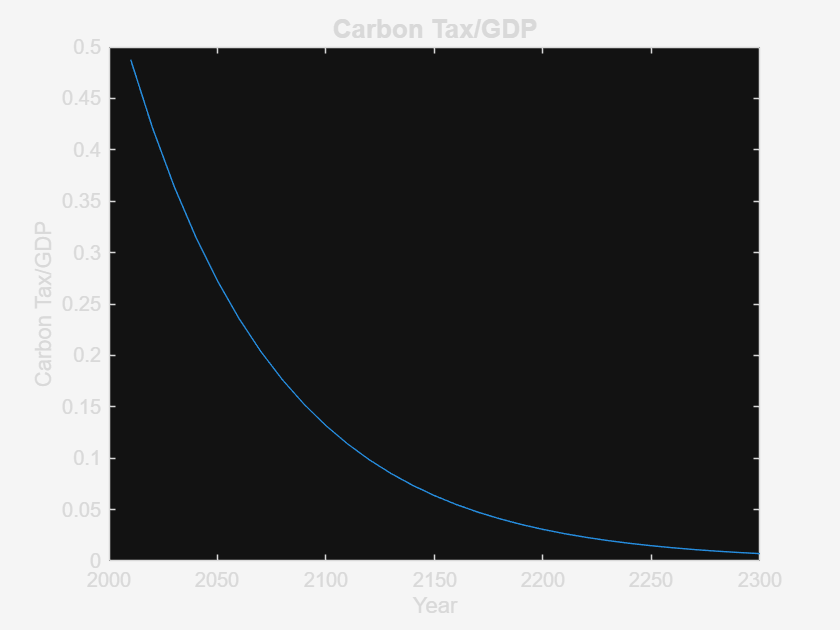

In [9]:

z = 30;
plot(y2(1:z),oiln(1:z))
xlabel('Year','FontSize',11)
ylabel('Carbon Tax/GDP','FontSize',11)
title('Carbon Tax/GDP','FontSize',13)